<a href="https://colab.research.google.com/github/Asif-Anwar-Sajid/Machine-Learning-Assignments/blob/main/2019831045_ML_Banking_Logistic_Regression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing the Dependencies***


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

***Data collection & Pre-Processing***

In [9]:
# loading the data from csv file to a pandas dataframe
deposit_data = pd.read_csv('/content/bank-full.csv', sep=';')

In [10]:
# first 5 rows of the dataframe
deposit_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
# numbers of rows & columns
deposit_data.shape

(45211, 17)

In [12]:
# checking if the dataset is imbalanced or not
deposit_data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [13]:
#loading the label encoder function
label_encoder = LabelEncoder()

In [14]:
labels = label_encoder.fit_transform(deposit_data.y)

In [15]:
# appending the target label to the DataFrame
deposit_data['target'] = labels

In [16]:
deposit_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [17]:
# dropping the y column
deposit_data.drop(['y'], axis=1, inplace=True)

***Label Encoding for all the features***

In [18]:
# job - label encoding
labels = label_encoder.fit_transform(deposit_data.job)
deposit_data.drop(['job'], axis=1, inplace=True)
deposit_data['job'] = labels

#martial status - label encoding
labels = label_encoder.fit_transform(deposit_data.marital)
deposit_data.drop(['marital'], axis=1, inplace=True)
deposit_data['marital'] = labels

#education status - label encoding
labels = label_encoder.fit_transform(deposit_data.education)
deposit_data.drop(['education'], axis=1, inplace=True)
deposit_data['education'] = labels

#default status - label encoding
labels = label_encoder.fit_transform(deposit_data.default)
deposit_data.drop(['default'], axis=1, inplace=True)
deposit_data['default'] = labels

#housing status - label encoding
labels = label_encoder.fit_transform(deposit_data.housing)
deposit_data.drop(['housing'], axis=1, inplace=True)
deposit_data['housing'] = labels

#loan status - label encoding
labels = label_encoder.fit_transform(deposit_data.loan)
deposit_data.drop(['loan'], axis=1, inplace=True)
deposit_data['loan'] = labels

#contact status - label encoding
labels = label_encoder.fit_transform(deposit_data.contact)
deposit_data.drop(['contact'], axis=1, inplace=True)
deposit_data['contact'] = labels

#month status - label encoding
labels = label_encoder.fit_transform(deposit_data.month)
deposit_data.drop(['month'], axis=1, inplace=True)
deposit_data['month'] = labels

#month status - poutcome encoding
labels = label_encoder.fit_transform(deposit_data.poutcome)
deposit_data.drop(['poutcome'], axis=1, inplace=True)
deposit_data['poutcome'] = labels

In [19]:
deposit_data.head()

,age,balance,day,duration,campaign,pdays,previous,target,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,0,11,2,3,0,0,0,2,8,3


In [20]:
# taking the 'target' to the last column
target = deposit_data['target']

deposit_data.drop(['target'], axis=1, inplace=True)
deposit_data['target'] = target

In [21]:
deposit_data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,target
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


***Separating Features and Target***

In [22]:
X = deposit_data.drop(columns='target', axis=1)
Y = deposit_data['target']

In [23]:
print(X)

       age  balance  day  duration  campaign  pdays  previous  job  marital  \
0       58     2143    5       261         1     -1         0    4        1   
1       44       29    5       151         1     -1         0    9        2   
2       33        2    5        76         1     -1         0    2        1   
3       47     1506    5        92         1     -1         0    1        1   
4       33        1    5       198         1     -1         0   11        2   
...    ...      ...  ...       ...       ...    ...       ...  ...      ...   
45206   51      825   17       977         3     -1         0    9        1   
45207   71     1729   17       456         2     -1         0    5        0   
45208   72     5715   17      1127         5    184         3    5        1   
45209   57      668   17       508         4     -1         0    1        1   
45210   37     2971   17       361         2    188        11    2        1   

       education  default  housing  loan  contact  

In [24]:
print(X)

       age  balance  day  duration  campaign  pdays  previous  job  marital  \
0       58     2143    5       261         1     -1         0    4        1   
1       44       29    5       151         1     -1         0    9        2   
2       33        2    5        76         1     -1         0    2        1   
3       47     1506    5        92         1     -1         0    1        1   
4       33        1    5       198         1     -1         0   11        2   
...    ...      ...  ...       ...       ...    ...       ...  ...      ...   
45206   51      825   17       977         3     -1         0    9        1   
45207   71     1729   17       456         2     -1         0    5        0   
45208   72     5715   17      1127         5    184         3    5        1   
45209   57      668   17       508         4     -1         0    1        1   
45210   37     2971   17       361         2    188        11    2        1   

       education  default  housing  loan  contact  

In [25]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 45211, dtype: int64


0 --> No

1 --> Yes

***Data Standardization***

In [26]:
scaler = StandardScaler()
standarized_X = scaler.fit_transform(X)

In [27]:
print(standarized_X)

[[ 1.60696496  0.25641925 -1.29847633 ...  1.51430611  0.82377336
   0.44489814]
 [ 0.28852927 -0.43789469 -1.29847633 ...  1.51430611  0.82377336
   0.44489814]
 [-0.74738448 -0.44676247 -1.29847633 ...  1.51430611  0.82377336
   0.44489814]
 ...
 [ 2.92540065  1.42959305  0.14341818 ... -0.71301166  1.15634426
  -0.56617504]
 [ 1.51279098 -0.22802402  0.14341818 ...  0.40064723  1.15634426
   0.44489814]
 [-0.37068857  0.52836436  0.14341818 ... -0.71301166  1.15634426
  -1.57724822]]


In [28]:
print(type(standarized_X))
print(type(X))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [29]:
X = standarized_X

In [30]:
print(Y)
print(type(Y))

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 45211, dtype: int64
<class 'pandas.core.series.Series'>


***Splitting the data into traning and testing data***

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [32]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(45211, 16) (36168, 16) (9043, 16)
(45211,) (36168,) (9043,)


***Creating a model and Logistic Regression will be used to train it***

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [34]:
# feeding the model the training data to train
model.fit(X_train, Y_train)

LogisticRegression()

***Checking the accuracy of the trained model on the testing data***

In [43]:
model.score(X_test, Y_test)

0.8926241291606768

In [45]:
Y_pred = model.predict(X_test)

***Evaluating the performance of the trained model***

Accuracy: 0.89
Confusion Matrix:
 [[7822  124]
 [ 847  250]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7946
           1       0.67      0.23      0.34      1097

    accuracy                           0.89      9043
   macro avg       0.79      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043

ROC-AUC Score: 0.87


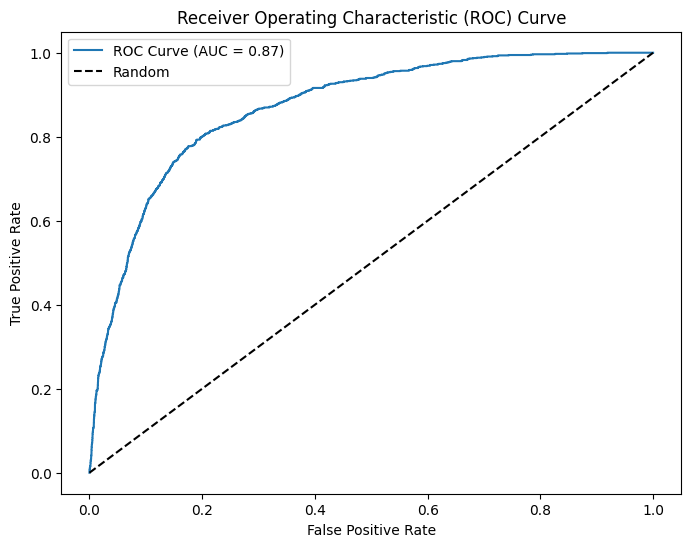

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

***Conclusion***: From the classification report it can be seen that precision, recall, f1-score for class-1 is low. It is because of the biasedness of the dataset. From the support column we can understand that data with class-1 is quite less compared class-0 in the dataset.

It could have handled by randomly selecting lesser number of data rows of class-0 and creating a new dataset using them along with all data rows of class-1. But since the number of data rows is not that huge, it wouldn't be a wise decision to shorten the dataset more.